In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopy.distance

In [ ]:
https://plot.ly/python/scatter-plots-on-maps/

In [3]:
city_data =  pd.read_csv('../city_location_and_select/King_county_city_data.csv')

In [32]:
df_raw = pd.read_csv('../King_County_House_prices_dataset.csv')
df_raw['Mprice'] = df_raw.price / 1e6

(-122.5658139784946, -121.6541860215054, 47.1223143598234, 47.814585640176595)

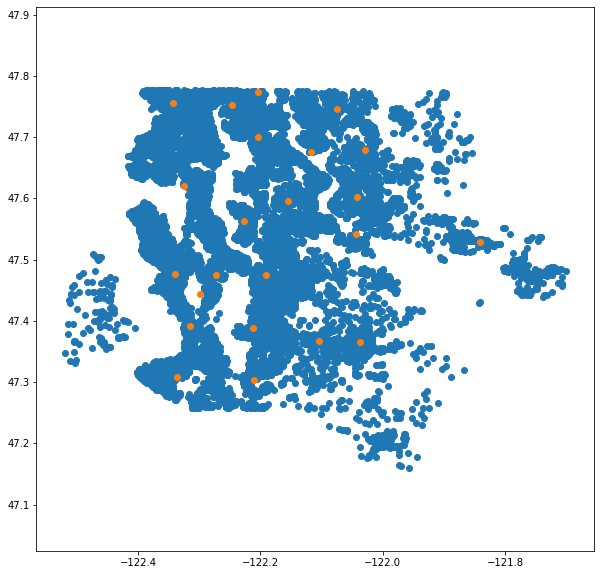

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(x='long',y='lat',data=df_raw[df_raw.long < -121.7])
plt.scatter(x='lng',y='lat',data=city_data)
plt.axis('equal')


In [34]:
import geopy.distance
def distto(c1, c2):
    return geopy.distance.vincenty(c1, c2).km


In [35]:
df_raw['coord'] = list(zip(df_raw.lat, df_raw.long))
city_data['coord'] = list(zip(city_data.lat, city_data.lng))

In [36]:
for cn in city_data['city']:
    city_coord = city_data[city_data.city == cn].coord
    df_raw[cn] = pd.Series(df_raw.coord.apply(lambda x: distto(x,city_coord)))

/Users/arnescheunemann/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
city = 'Seattle'
df_raw[df_raw[city] < 20].shape

(13361, 46)

(-122.5658139784946, -121.6541860215054, 47.1223143598234, 47.814585640176595)

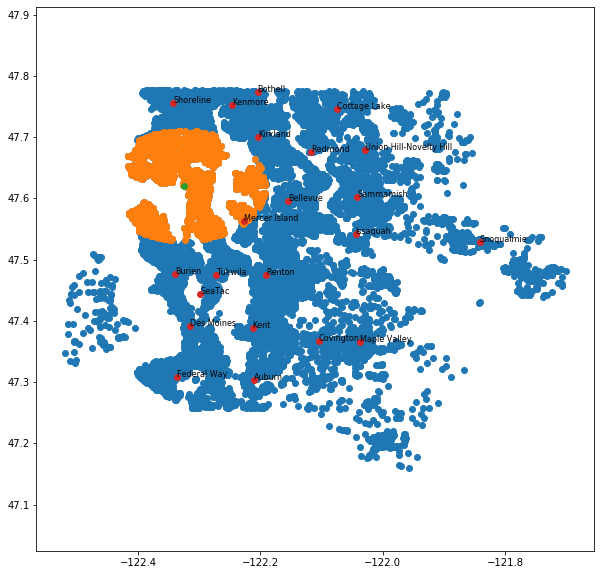

In [100]:
city = 'Seattle'

plt.figure(figsize=(10,10))
plt.scatter(x='long',y='lat',data=df_raw[df_raw.long < -121.7])
plt.scatter(x='long',y='lat',data=df_raw[df_raw[city] < 10])
plt.scatter(x='lng',y='lat',data=city_data[city_data.city == city])
d = city_data[city_data.city != city]
plt.scatter(x='lng',y='lat',data=d[d.city != city])
for c,lat,lng in zip(d.city,d.lat,d.lng):
    plt.text(lng,lat,c, fontsize=8)
plt.axis('equal')

/Users/arnescheunemann/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


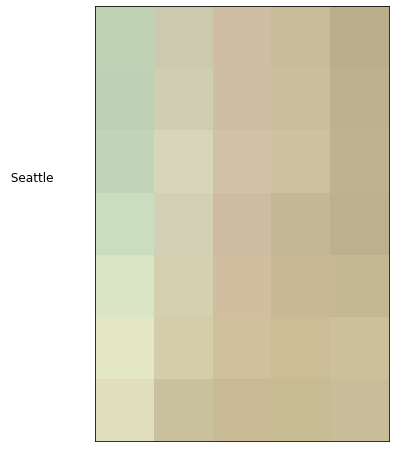

In [99]:
import os
os.environ['PROJ_LIB'] = os.curdir
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='merc', lat_0=57, lon_0=-135,resolution = 'h',
    llcrnrlon=-122, llcrnrlat=47,
    urcrnrlon=-121, urcrnrlat=48)
m.etopo(scale=0.3, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [39]:
city_data.city

0                   Shoreline
1                  Des Moines
2                     Seattle
3                     Tukwila
4                    Bellevue
5                Cottage Lake
6                        Kent
7                     Kenmore
8                      Burien
9                    Issaquah
10                   Kirkland
11    Union Hill-Novelty Hill
12                  Sammamish
13                     Auburn
14                Federal Way
15                    Bothell
16                 Snoqualmie
17              Mercer Island
18                     Renton
19                  Covington
20                     SeaTac
21               Maple Valley
22                    Redmond
Name: city, dtype: object

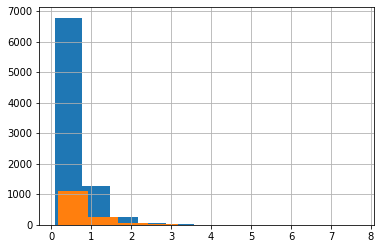

In [50]:
df_raw[(df_raw['Seattle'] < 15) & (df_raw['Seattle'] > 5)].Mprice.hist()
df_raw[(df_raw['Seattle'] < 5) & (df_raw['Seattle'] > 0)].Mprice.hist()

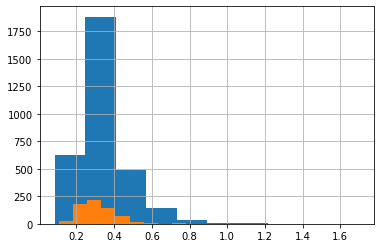

In [52]:
df_raw[(df_raw['Covington'] < 15) & (df_raw['Covington'] > 5)].Mprice.hist()
df_raw[(df_raw['Covington'] < 5) & (df_raw['Covington'] > 0)].Mprice.hist()

32291.74515354725


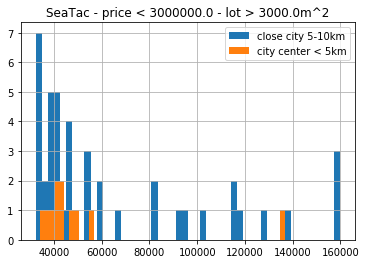

In [94]:
city= 'SeaTac'#'Seattle'#'Covington'
key= 'sqft_lot'#'Mprice'#'sqft_lot'
price_limit = 3e6
lot_thres = 3000/0.092903
d1 = df_raw[(df_raw[city] < 10) & (df_raw[city] > 5) & (df_raw['sqft_lot'] > lot_thres) & (df_raw['price'] < price_limit)]
d2 = df_raw[(df_raw[city] < 5) & (df_raw[city] > 0) & (df_raw['sqft_lot'] > lot_thres) & (df_raw['price'] < price_limit)]
d1[key].hist(bins=50)
d2[key].hist(bins=50)
plt.legend(['close city 5-10km','city center < 5km'])
plt.title(f'{city} - price < {price_limit} - lot > {np.round(lot_thres*0.092903)}m^2')
print(lot_thres)

In [95]:
d1[(d1.price < d1.price.min()*1.5) & (d1.sqft_lot > d1.sqft_lot.max()*0.1 ) ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,Auburn,Federal Way,Bothell,Snoqualmie,Mercer Island,Renton,Covington,SeaTac,Maple Valley,Redmond
3768,622059019,9/19/2014,220000.0,5,1.50,1830,94960,1.5,0.0,0.0,...,13.096320,15.381308,39.127370,30.814833,15.656195,6.351827,10.532904,6.583360,15.025315,29.290469
4248,87000245,9/30/2014,170000.0,3,0.75,1040,42180,1.0,0.0,0.0,...,16.446008,18.945399,35.780923,28.306054,12.480843,2.744197,11.844092,7.555323,15.526445,25.702773
5914,6197800101,8/5/2014,235000.0,3,1.00,1330,45738,2.0,0.0,0.0,...,14.795288,18.145285,37.563591,27.910812,14.407727,4.444347,9.808496,8.620689,13.634046,27.193229
9038,6623400090,4/21/2015,222000.0,2,1.00,1550,38449,1.0,0.0,0.0,...,14.193050,17.099690,38.037730,29.077485,14.711304,4.966794,10.136014,7.650810,14.251776,27.899084
12523,922059020,7/16/2014,242025.0,4,1.75,1400,54014,1.5,0.0,0.0,...,12.530105,16.472298,39.866197,28.782238,16.676197,6.744203,8.074178,9.235269,12.396624,29.443751


In [54]:
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Mprice', 'coord',
       'Shoreline', 'Des Moines', 'Seattle', 'Tukwila', 'Bellevue',
       'Cottage Lake', 'Kent', 'Kenmore', 'Burien', 'Issaquah', 'Kirkland',
       'Union Hill-Novelty Hill', 'Sammamish', 'Auburn', 'Federal Way',
       'Bothell', 'Snoqualmie', 'Mercer Island', 'Renton', 'Covington',
       'SeaTac', 'Maple Valley', 'Redmond'],
      dtype='object')

In [101]:
df_raw.to_csv('King_County_House_prices_dataset_Acitydist.csv')